<font color=red>
Author:</font>  Federico Ambrogi 
                federico.ambrogi88@gmail.com
                University of Vienna - Dep. Meteorology and Geophysics     
<br>    
<font color=red>Module: </font>WMO_SCHROEDER_sensor_mapping.ipynb
<br>
Notebook performing preliminary mapping between the sensor id list from SCHRODER [ref: xxx ]
and the WMO codes [ref: xxx]        
</font>

# Analyze mapper WMO-SCHROEDER


Summary of mapping between the sensor id provided by the Schroeder and the WMO codes.
<br>
<br>

## 1) Sonde mapping with CUON 2022 Data
In the previous version (till 2022) we took the Schroeder's data until the year 2013 with a hard cut off limit.
After the year 2013, we were using the WMO sensor id taken from ERA5 feedback.

The last updated of the sensor in the Schroeder's data was extended up to the year 2013.

The data represented here was created by taking the last sensor from the Schroeder's table with the 2022 data (31/12/2012),
and the first data from the WMO table (from 01/01/2013).

For each station, we took the last Schroeder and the first WMO.

The results are shown in the table below, where for each WMO code we map all the possible Schroeder's code.

<br>
<br>

In [1]:
import os,sys
import pandas as pd 

file = 'mapped_wmo_sch.csv'
df = pd.read_csv(file, sep ='\t')

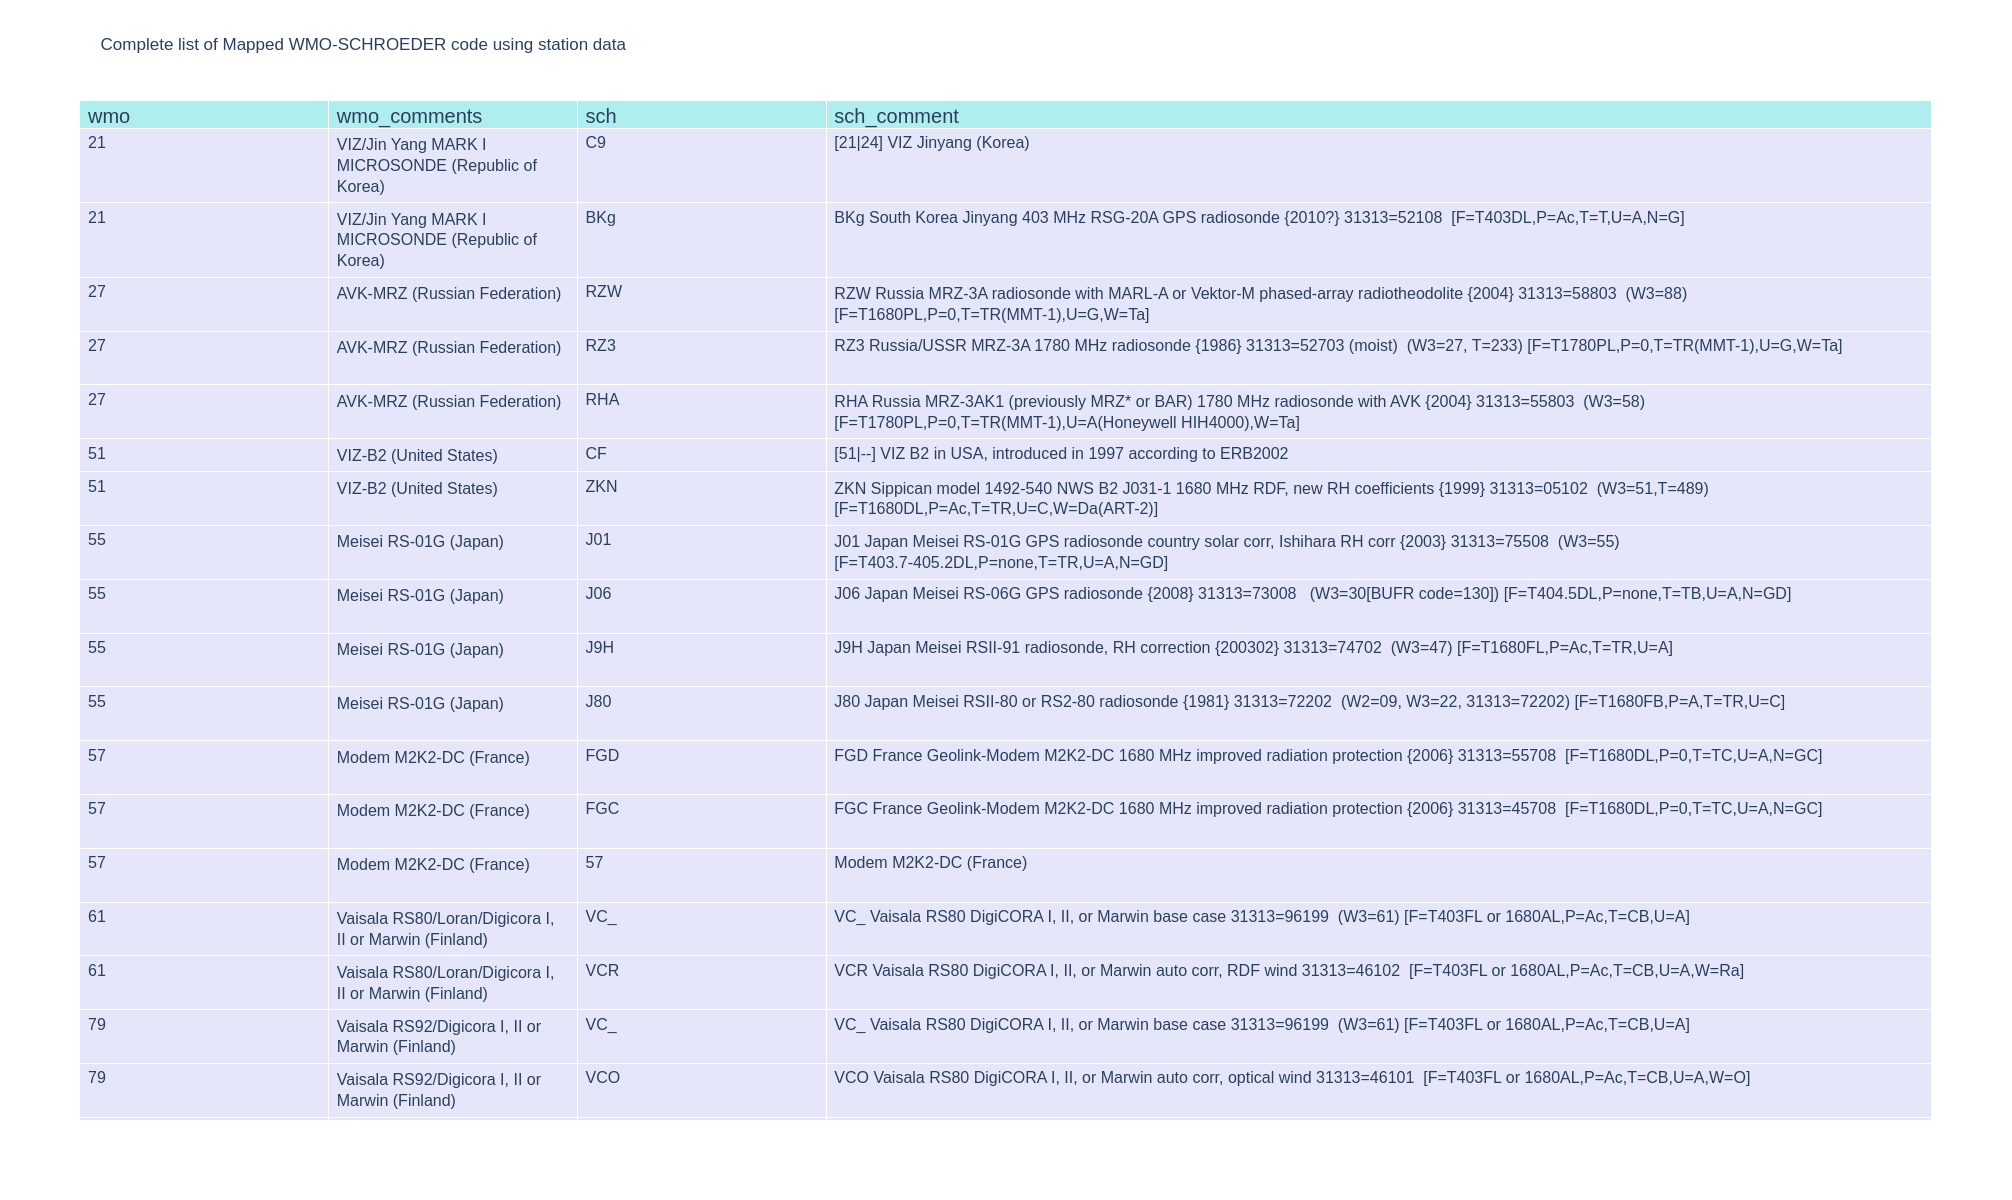

In [2]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(data=[go.Table(
    header=dict(values=list(['wmo','wmo_comments', 'sch' , 'sch_comment']),
                fill_color='paleturquoise',
                align='left',
               font_size=20),
    columnwidth = [90,90,90,400],
    cells=dict(values=[df.wmo, df.wmo_comment, df.sch, df.sch_comment],
               fill_color='lavender',
               align='left',
               font_size=16,
               height=30
              )),
])

fig.update_layout(width=1800, height=1200, title = 'Complete list of Mapped WMO-SCHROEDER code using station data')

fig.show()

## 2) General mapping for selected WMO sensor)

We realized that sometimes the data from Schroeder stopped much earlier than 2013, e.g. Payerne data was last updated in 2006.

This meant that the sensor last recorded in 2006 was taken by us to be used until 2013. 

We then decided to change this so that we used the Schroeder information until the last update in the Schroeder's table,
and then switch immediately (from the following day) to the WMO ERA5 ids.


<br>
<br>


#### Map the following WMO  52,61,78, 79, 80, 81, 72, 73, 74  

The task in the following is to extract all the possible SCHROEDER's ids that map onto any of these WMO ids.

The input is the **sensor_configuration** Common Data Model table which contains the global description of WMO and SCH sensors.

<br>
<br>

The procedure is the following:

- extract the unigram i.e. one word representation from the description of the WMO sensors from the above list by hand (e.g. Vaisala RS80-57H -> ['vaisala','rs80','57h']

- extract the unigram i.e. one word representation from the description of the SCH sensors (automatically using regex) since it is a long list of sensors 

- search for the WMO most relevant unigrams inside SCH description trying to avoid incosistencies

<br>
<br>



In [3]:
# Map the following WMO  52,61,78, 79, 80, 81, 72, 73, 74 

In [4]:
sensor_configuration = pd.read_csv('sensor_configuration_all.csv', sep = '\t')[['sensor_id','comments']]
sensor_configuration.keys()

Index(['sensor_id', 'comments'], dtype='object')

In [5]:
wmos = ['52','61','78', '79', '80', '81', '72', '73', '74'  ]
wmo_df = sensor_configuration[sensor_configuration['sensor_id'].isin( wmos ) ]
# simplify datafram for simpler access 
wmo_dic = dict(zip( wmo_df.sensor_id , wmo_df.comments )) 

In [6]:
wmo_dic

{'52': 'Vaisala RS80-57H                 ',
 '61': 'Vaisala RS80/Loran/Digicora I, II or Marwin (Finland)            ',
 '72': 'Vaisala RS90/PC-Cora (Finland)                ',
 '73': 'Vaisala RS90/Autosonde (Finland)                ',
 '74': 'Vaisala RS90/Star (Finland)                ',
 '78': 'Vaisala RS90/Digicora III (Finland)               ',
 '79': 'Vaisala RS92/Digicora I, II or Marwin (Finland)            ',
 '80': 'Vaisala RS92/Digicora III (Finland)               ',
 '81': 'Vaisala RS92/Autosonde (Finland)                '}

In [7]:
wmo_df

sensor_id                                           comments
3346        52                  Vaisala RS80-57H                 
3355        61  Vaisala RS80/Loran/Digicora I, II or Marwin (F...
3366        72     Vaisala RS90/PC-Cora (Finland)                
3367        73   Vaisala RS90/Autosonde (Finland)                
3368        74        Vaisala RS90/Star (Finland)                
3372        78  Vaisala RS90/Digicora III (Finland)           ...
3373        79  Vaisala RS92/Digicora I, II or Marwin (Finland...
3374        80  Vaisala RS92/Digicora III (Finland)           ...
3375        81   Vaisala RS92/Autosonde (Finland)

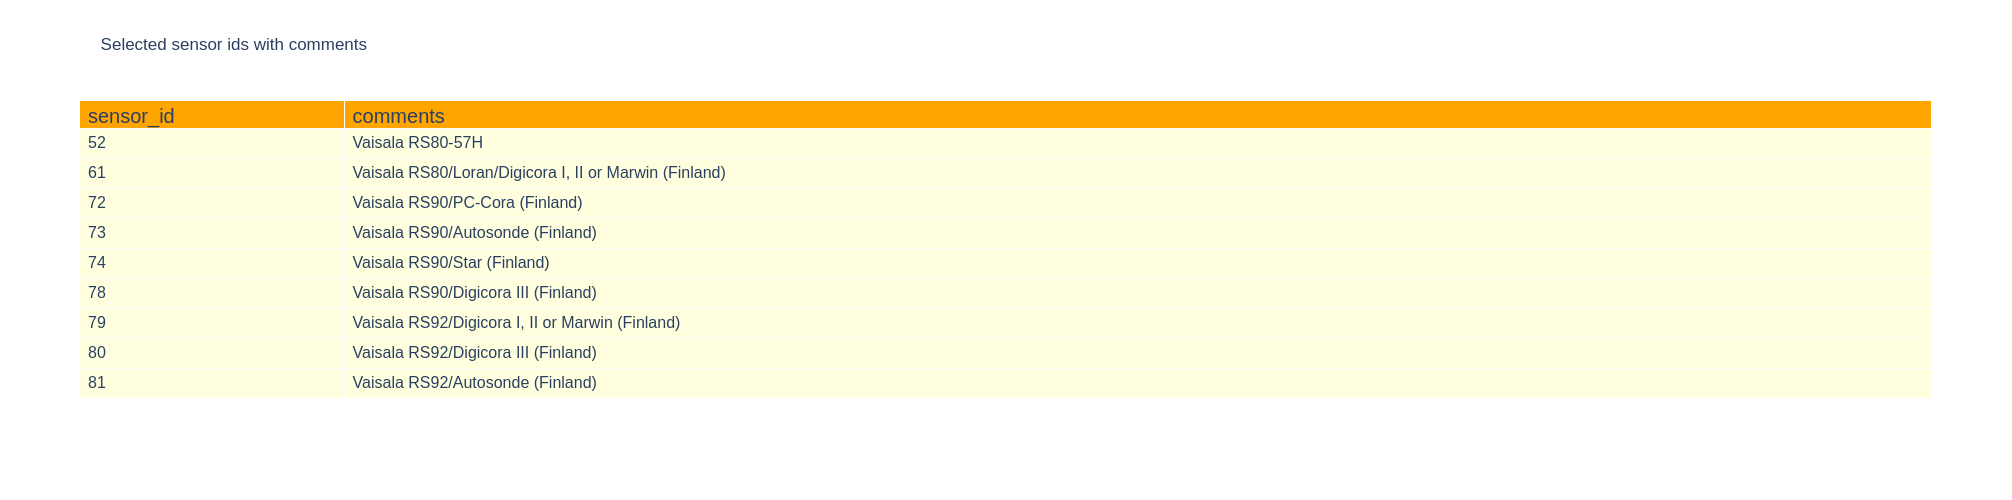

In [8]:
def make_tab_2col(df , h=500):

    fig = go.Figure(data=[go.Table(
        header=dict(values=list(['sensor_id','comments']),
                    fill_color='orange',
                    align='left',
                   font_size=20),
        columnwidth = [100,600],
        cells=dict(values=[df.sensor_id, df.comments],
                   fill_color='lightyellow',
                   align='left',
                   font_size=16,
                   height=30
                  )),
    ])

    fig.update_layout(width=1800, height=h, title = 'Selected sensor ids with comments')
    return fig
a = make_tab_2col(wmo_df)
a.show()

In [9]:
import re

def wmo_sch_map(wmo=52, sch_list=[]):
    """ Checking if essential key words taken from the description of the WMO sensor_id is present in the unigram representation
    of the description of the WMO codes 
    
    input: 
            wmo: [int]       -> wmo code to be mapped to Schroeder's sensors 
            sch_list: [list] -> list of unigrams extracted from Schroeder's sensor description  
            
    output:
            bool_: [bool]    -> boolean value checking compatible descriptions
    """
    
    if wmo=='52':
        bool_ = 'vaisala' in sch_list and 'rs80' in sch_list and '57' in sch_list 
        
    if wmo=='61':
        bool_ = 'vaisala' in sch_list and 'rs80' in sch_list 
        bool_ = bool_ and ('loran' in sch_list or 'digicora' in sch_list or 'marwin' in sch_list or 'I' in sch_list or 'II' in sch_list )
        
    if wmo=='72':
        bool_ = 'vaisala' in sch_list and 'rs90' in sch_list and 'pc' in sch_list and 'cora' in sch_list 
        
    if wmo=='73':
        bool_ = 'vaisala' in sch_list and 'rs90' in sch_list and 'autosonde'  in  sch_list
        
    if wmo=='74':
        bool_ = 'vaisala' in sch_list and 'rs90' in sch_list and 'star'  in  sch_list
        
    if wmo=='78':
        bool_ = 'vaisala' in sch_list and 'rs90' in sch_list and 'digicora' in sch_list and 'III' in  sch_list

    if wmo=='79':
        bool_ = 'vaisala' in sch_list and 'rs92' in sch_list  and 'digicora' in sch_list and ( 'I' in  sch_list or 'II' in  sch_list or 'marwin' in  sch_list )
        
    if wmo=='80':
        bool_ = 'vaisala' in sch_list and 'rs92' in sch_list and 'digicora' in sch_list and 'III' in  sch_list 
        
    if wmo == '81':
        bool_ = 'vaisala' in sch_list and 'rs92' in sch_list and 'autosonde' in  sch_list 
        
        
    return bool_ 
        




In [10]:
wmos

['52', '61', '78', '79', '80', '81', '72', '73', '74']

In [11]:
wmo_all, wmo_comments, sch_all, sch_comments = [],[],[],[]


all_vaisala_indices = []

# Looping over the full sensor_configuration containing both WMO and SCH ids 
for index, row in sensor_configuration.iterrows():
    s_id , comment = row.sensor_id.replace("b' '",''), row.comments.replace("b' '",'')
    
    # case matching: using regex to split lines, then put all to lwoer case
    split = re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>? ]', comment)  # splitting words by spaces, characters etc.comment
    split = [f.lower() for f in split if f] # lower case letters to make items uniform
    
    if 'vaisala' in split and ('rs80' in split or 'rs90' in split or 'rs92' in split):
        all_vaisala_indices.append(index)
        
        
        
    # testing special sondes
    if 'rs92' in split and 'digicora' in split and 'III' in split:  # -> does not exist
        print(row)
        
    if 'rs92' in split and 'digi' in split and 'III' in split:  # -> does not exist
        print(row)      
        
    if 'rs90' in split and 'digi' in split and 'III' in split:  # -> does not exist
        print(row)          
        
    if 'rs90' in split and 'digicora' in split and 'III' in split:  # -> does not exist
        print(row)        
        
        
        
    # find possible wmo matching
    for w in wmos:
        if w == s_id:
            continue
        bool_ = wmo_sch_map(wmo=w , sch_list=split)
        
        if bool_:
            sch = s_id[1:].replace("b' ","").replace("'","")
            if '7' in w and '7' in sch:
                continue
            if '61' in w and '7' in sch:
                continue            
            sch_all.append(sch)
            sch_comments.append(comment.replace("b' ","").replace("'",""))
            
            wmo_all.append(w)
            wmo_comments.append(wmo_dic[w].replace("b'","").replace("'",""))
            
            
dic = { 'wmo_id': wmo_all , 
        'wmo_comments':wmo_comments,
        'sch_id' : sch_all,
        'sch_comments':sch_comments,
      } 

### Converting to DataFrame
df_res = pd.DataFrame.from_dict(dic)
df_res = df_res.sort_values( by=['wmo_id'])           

## Checking all VAISALA sondes RS80, RS90, RS92

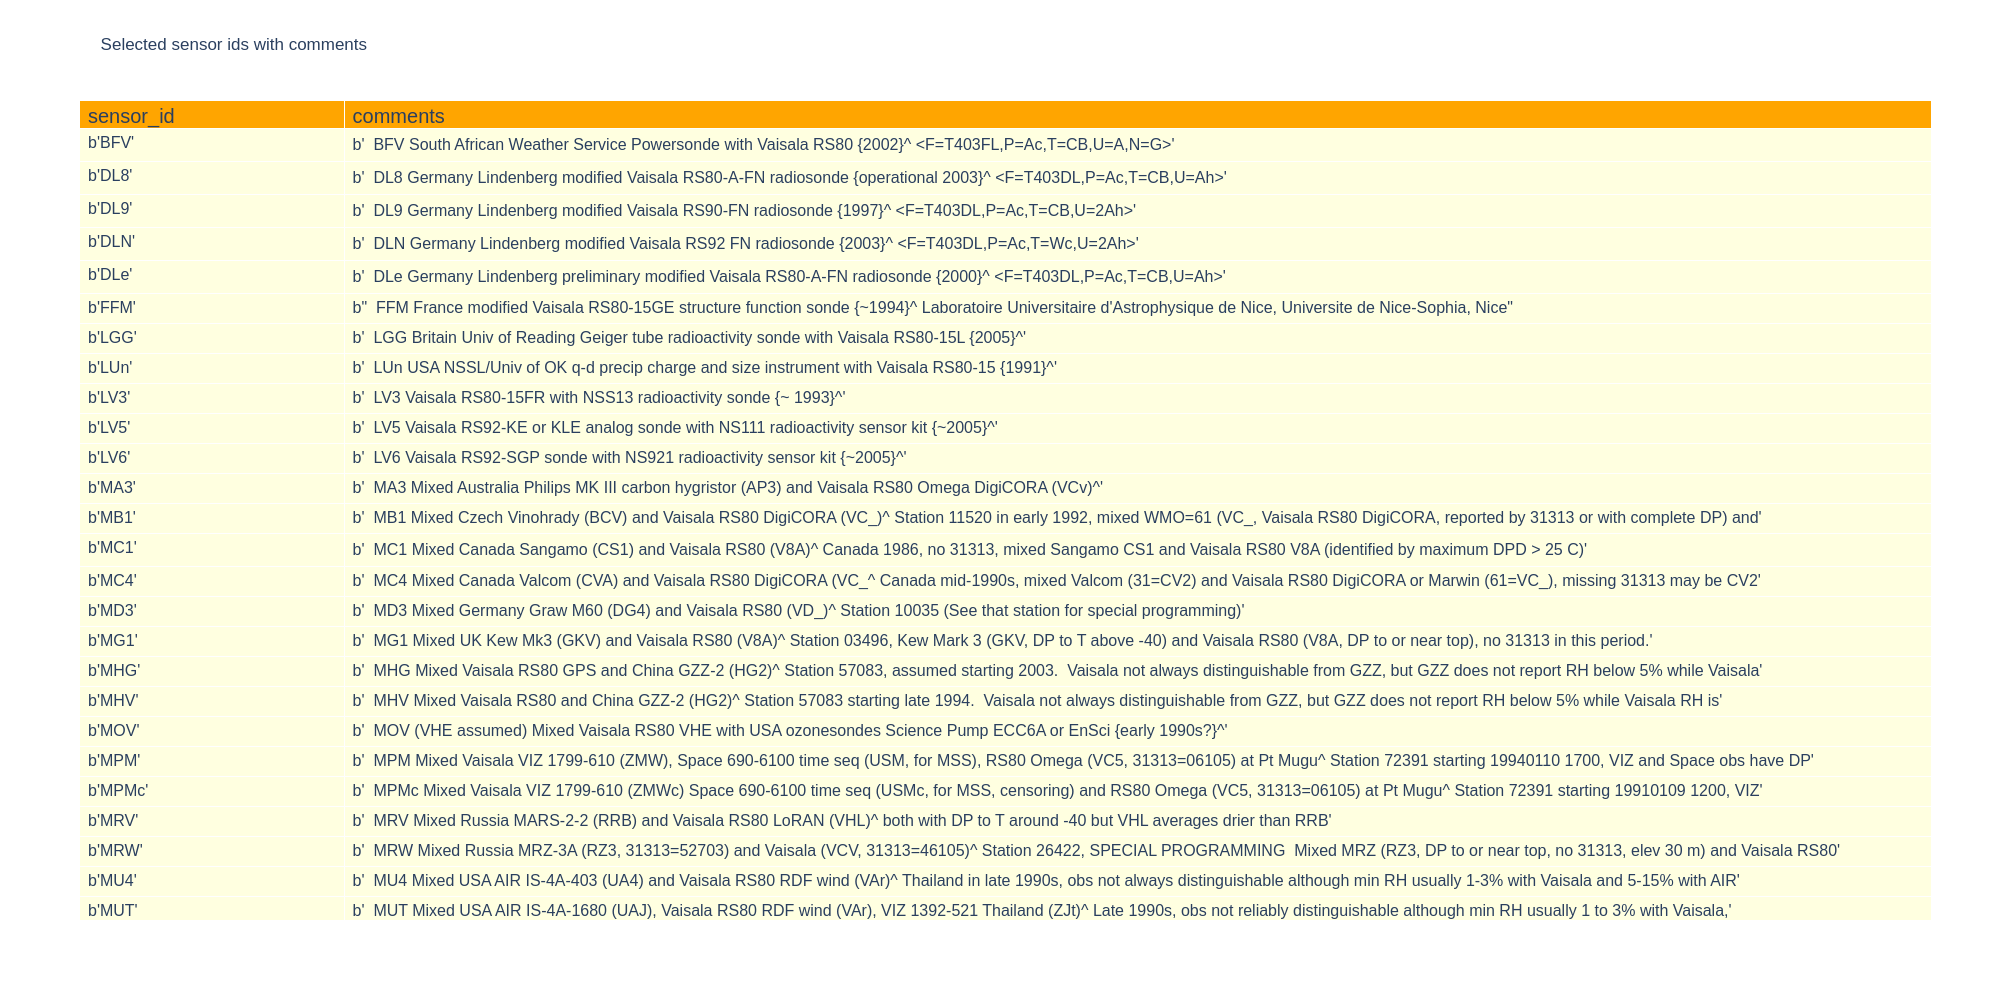

In [12]:
all_vaisala = sensor_configuration.iloc[all_vaisala_indices]
a = make_tab_2col(all_vaisala, h=1000)
a.show()

In [13]:
df_res.head(5)

wmo_id                                       wmo_comments sch_id  \
77     52                  Vaisala RS80-57H                     VU4   
76     52                  Vaisala RS80-57H                     VU3   
0      61  Vaisala RS80/Loran/Digicora I, II or Marwin (F...    MA3   
50     61  Vaisala RS80/Loran/Digicora I, II or Marwin (F...    VDl   
49     61  Vaisala RS80/Loran/Digicora I, II or Marwin (F...    VDU   

                                         sch_comments  
77   VU4 Vaisala RS80-57H or RS80-57 1680 MHz RDF ...  
76   VU3 Vaisala RS80-57H or RS80-57 1680 MHz RDF ...  
0    MA3 Mixed Australia Philips MK III carbon hyg...  
50   VDl Vaisala RS80 PC Cora auto solar corr, LoR...  
49   VDU Vaisala RS80 PC Cora auto corr, Loran or ...

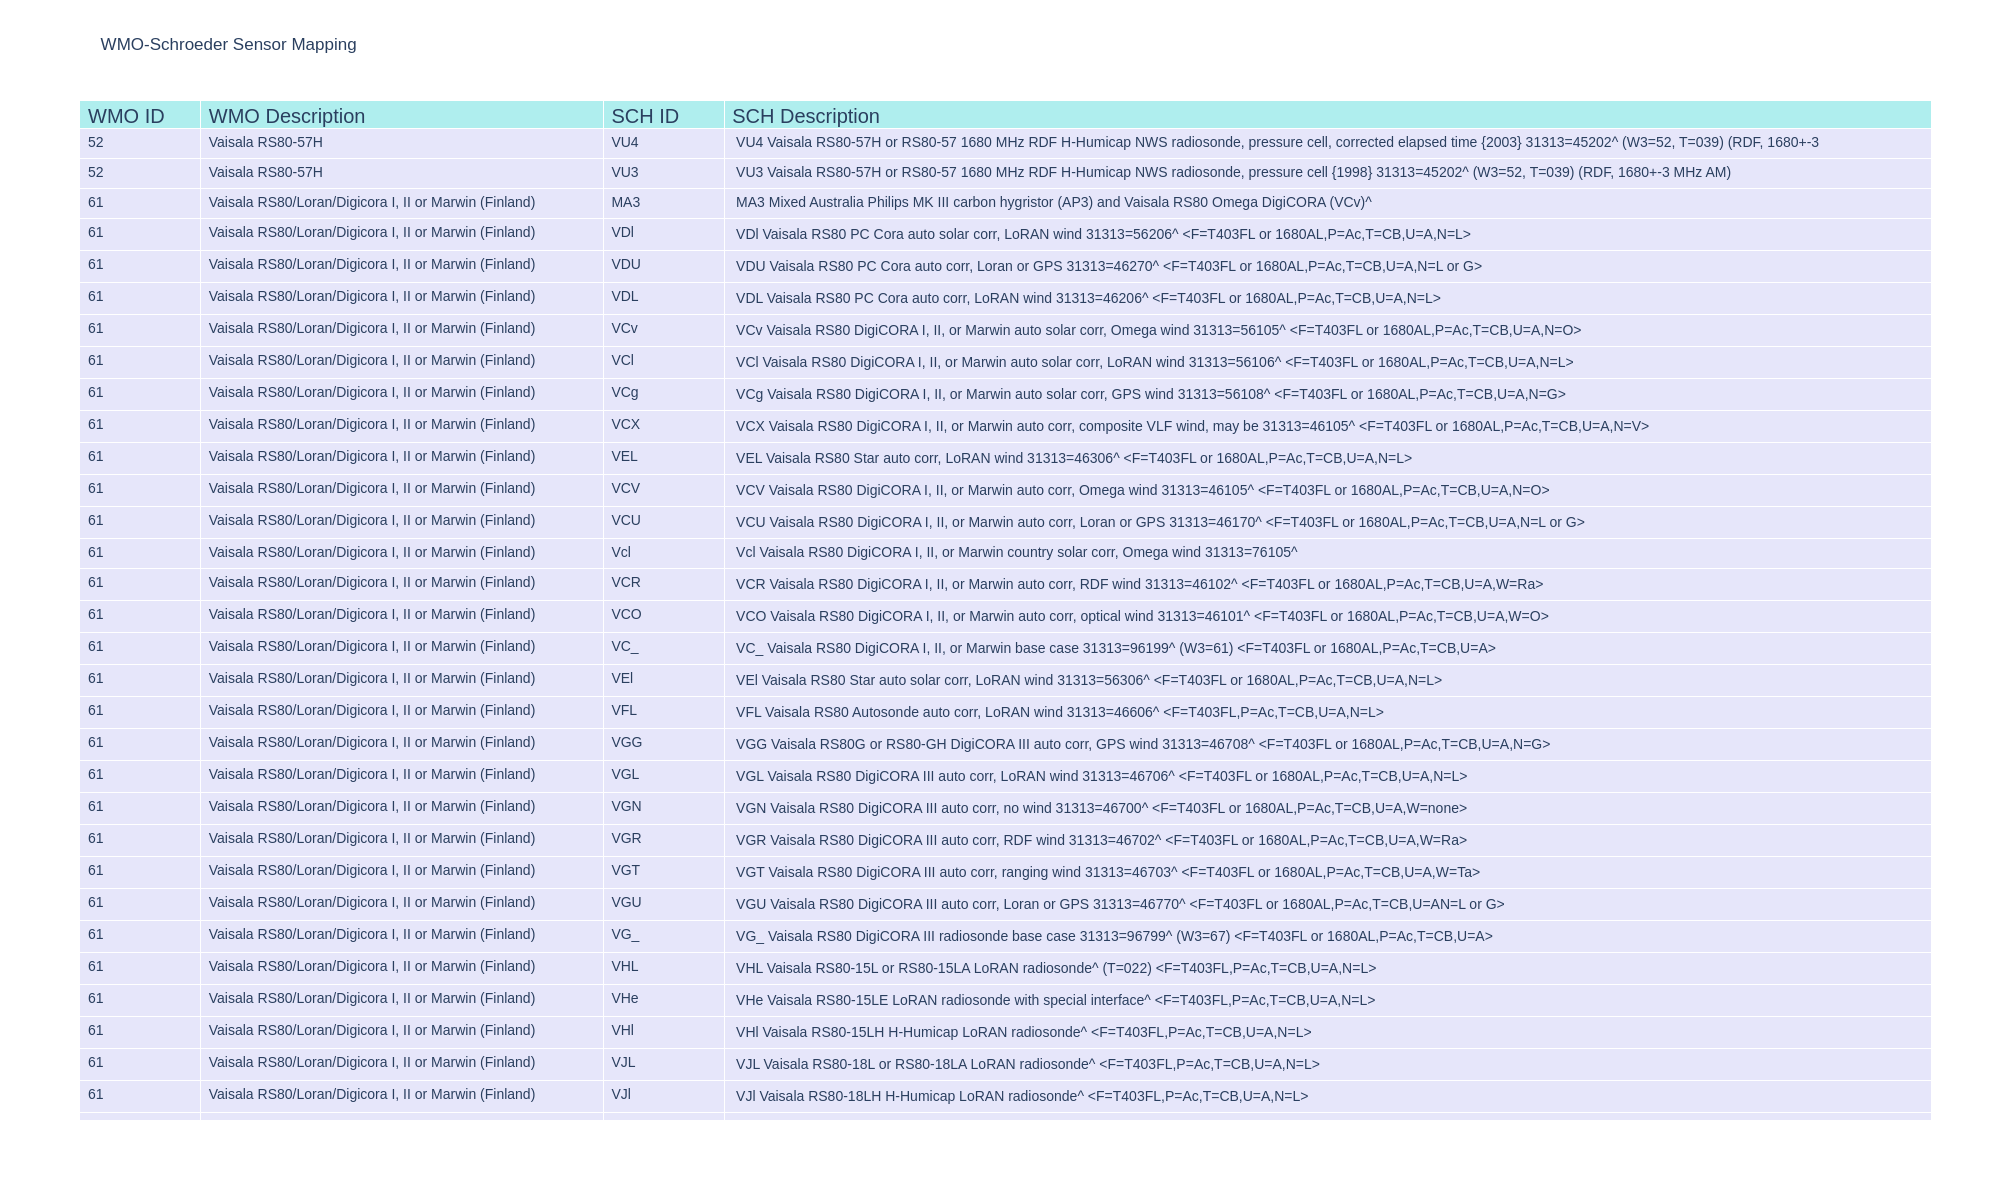

In [19]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(['WMO ID','WMO Description' , 'SCH ID', 'SCH Description']),
                fill_color='paleturquoise',
                align='left',
               font_size=20),
    columnwidth = [60,200,60,600],
    cells=dict(values=[df_res.wmo_id, df_res.wmo_comments,  df_res.sch_id, df_res.sch_comments],
               fill_color='lavender',
               align='left',
               font_size=14,
               height=30
              )),
])

fig.update_layout(width=1800, height=1200, title = 'WMO-Schroeder Sensor Mapping')

fig.show()

fig.write_html("out_data/wmo_sch_mapping.html")


## Exporting to mapping to TSV, YAML, JSON files 

### All mapping

In [15]:
if not os.path.isdir('out_data'):
    os.mkdir('out_data')
# exporting to csv the ful table
df_res.to_csv('out_data/wmo_sch_mapping.tsv' , sep='\t', index=False)

### SCH to WMO

In [16]:
### creating dictionaries
dic_codes = dict(zip(df_res.sch_id , df_res.wmo_id )) 

# exporting to YAML
import yaml
with open('out_data/sch_to_wmo_mapping.yaml', 'w') as file:
    documents = yaml.dump(dic_codes, file)
# exporting to JSON
import json 
with open("out_data/sch_to_wmo_mapping.json", "w") as outfile:
    json.dump(dic_codes, outfile)
    

### WMO to SCH 

In [17]:
### from WMO to SCH
dic_codes = {}
for w in wmos:
    d = df_res.loc[df_res.wmo_id ==w ]
    dic_codes[w] = list(d.sch_id.values)

# exporting to YAML
import yaml
with open('out_data/wmo_to_sch_mapping.yaml', 'w') as file:
    documents = yaml.dump(dic_codes, file)
# exporting to JSON
import json 
with open("out_data/wmo_to_sch_mapping.json", "w") as outfile:
    json.dump(dic_codes, outfile)
    

In [18]:
dic_codes

{'52': ['VU4', 'VU3'],
 '61': ['MA3',
  'VDl',
  'VDU',
  'VDL',
  'VCv',
  'VCl',
  'VCg',
  'VCX',
  'VEL',
  'VCV',
  'VCU',
  'Vcl',
  'VCR',
  'VCO',
  'VC_',
  'VEl',
  'VFL',
  'VGG',
  'VGL',
  'VGN',
  'VGR',
  'VGT',
  'VGU',
  'VG_',
  'VHL',
  'VHe',
  'VHl',
  'VJL',
  'VJl',
  'VcV',
  'Vcg',
  'VCN',
  'VCL',
  'VCT',
  'VCA',
  'MVH',
  'MVF',
  'VCG',
  'MVB',
  'MV9',
  'MV8',
  'MVN',
  'MV5',
  'MV3',
  'MV2',
  'MV1',
  'MRV',
  'MC4',
  'MB1',
  'MV4',
  'MVQ',
  'MVC',
  'VAL',
  'VC6',
  'VC8',
  'MVS',
  'VC5',
  'VC2',
  'MrV',
  'MVT',
  'Mv4'],
 '78': [],
 '79': ['VNG', 'VNL', 'VNN', 'VNO', 'VNT', 'VN-', 'VnG'],
 '80': [],
 '81': ['MVP', 'VN8', 'VN6', 'VNU', 'VN0'],
 '72': ['V9b', 'V9=', 'V9h'],
 '73': ['V9U'],
 '74': ['V9*', 'V9d', 'V9c']}